### Michael Jordan DataSet From 1984 to 2003

___

In [278]:
import pandas as pd
import numpy as np

In [279]:
df = pd.read_csv('Michael_Jordan_Data.csv')
df['Age'] = df['Age'].astype(int)
df.head()

,EndYear,Rk,G,Date,Years,Days,Age,Tm,Home,Opp,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc
0,1985,1,1,10/26/1984,21,252,21,CHI,1,WSB,...,1,5,6,7,2,4,5,2,16,12.5
1,1985,2,2,10/27/1984,21,253,21,CHI,0,MIL,...,3,2,5,5,2,1,3,4,21,19.4
2,1985,3,3,10/29/1984,21,255,21,CHI,1,MIL,...,2,2,4,5,6,2,3,4,37,32.9
3,1985,4,4,10/30/1984,21,256,21,CHI,0,KCK,...,2,2,4,5,3,1,6,5,25,14.7
4,1985,5,5,11/1/1984,21,258,21,CHI,0,DEN,...,3,2,5,5,1,1,2,4,17,13.2


In [280]:
df.shape

(1072, 33)

### Lets see some statics from our data.

In [281]:
#With the describe method we can simple see some statics from our DataSet.
df['PTS'].describe()

count    1072.000000
mean       30.123134
std         9.752002
min         2.000000
25%        23.000000
50%        30.000000
75%        36.000000
max        69.000000
Name: PTS, dtype: float64

In [282]:
##Of a total of 1072 games played we will find out the average points of the athlete:
puntos = df['PTS']
promedio_pts = puntos.mean()
promedio_pts


30.12313432835821

In [283]:
#Let's see the mode: the number that is repeated more times:
moda = puntos.mode()


In [284]:
#The Median is: numbers are enumerated in a list in order and the middle value is chosen:
median= puntos.median()


In [285]:
#Standard Deviation: The standard deviation measures the spread of a data distribution. The more spread out a data distribution is, the larger its standard deviation from the mean:
std_deviation= puntos.std()


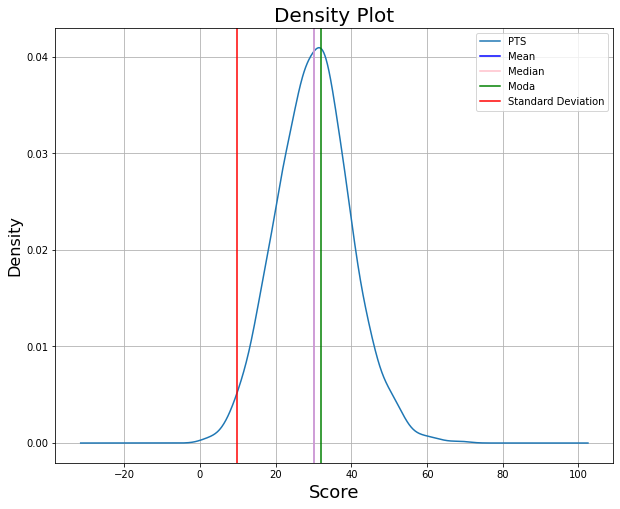

In [286]:
#Lets see the density of our PTS column:
plt.figure(figsize=(10,8))
df['PTS'].plot.kde()
plt.title("Density Plot",  fontsize=20)
plt.xlabel("Score", fontsize=18)
plt.ylabel("Density", fontsize=16)
plt.grid()
plt.axvline(x=promedio_pts, color='blue', label='Mean')
plt.axvline(x=median, color='pink', label='Median')
plt.axvline(x=moda.values[0], color='green', label='Moda')
plt.axvline(x=std_deviation, color = 'red', label = 'Standard Deviation')
plt.legend()
plt.show()


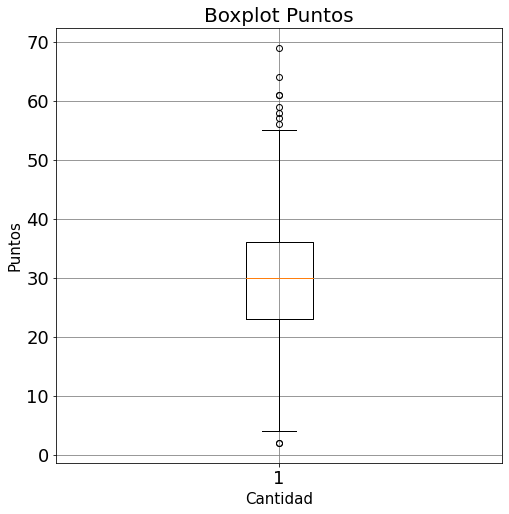

In [287]:
#Lets do a boxplot for the Puntos column to see what we got:
fig = plt.figure(figsize=(8,8))

plt.boxplot(puntos)
plt.title('Boxplot Puntos', fontsize=20)
plt.xlabel("Cantidad",fontsize=15)
plt.ylabel("Puntos", fontsize=15)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

plt.grid(color='grey')
plt.show()

### As we can se our orange line in the boxplot is 30 like our mean, and other data like quartile, outliers, etc.


___
### Lets study others variables:
___

### Correlation: The correlation coefficient can take a range of values ​​from +1 to -1. A value of 0 indicates that there is no association between the two variables. A value greater than 0 indicates a positive association. That is, as the value of one variable increases, so does the value of the other. A value less than 0 indicates a negative association; that is, as the value of one variable increases, the value of the other decreases.

In [288]:
#we are going to take the assistand column and do some simples analysis:
asistencias= df['AST']
promedio_ast = asistencias.mean()

In [289]:
#Creating a data frame with the variables:

df2 = df[['PTS','AST']]
df2.head()



,PTS,AST
0,16,7
1,21,5
2,37,5
3,25,5
4,17,5


In [290]:
#Lets find the correlation:
correlation_df2= df2.corr()

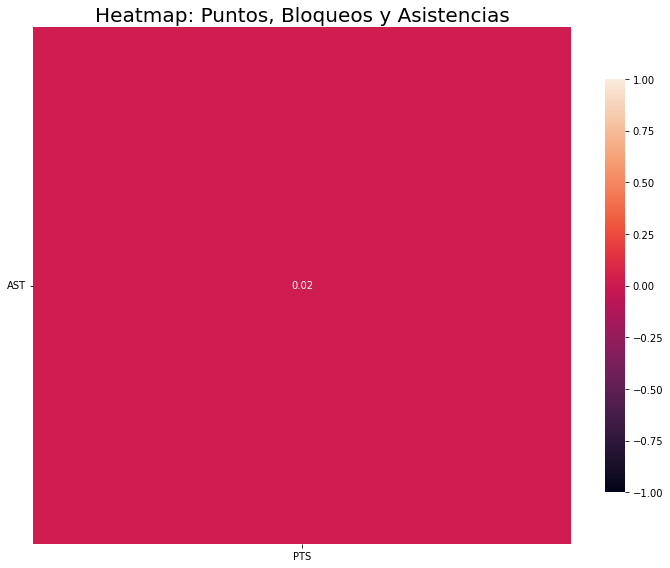

In [291]:
#Plot the variables in a HeatMap:
np.ones_like(correlation_df2, dtype=bool)
mask = np.triu(np.ones_like(correlation_df2, dtype=bool))
correlation_df2
fig, ax = plt.subplots(figsize=(10,8))# mask

mask = np.triu(np.ones_like(correlation_df2, dtype=bool))# adjust mask and df

mask = mask[1:, :-1]

corr = correlation_df2.iloc[1:,:-1].copy()# plot heatmap

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})# yticks

plt.yticks(rotation=0)
plt.title("Heatmap: Puntos, Bloqueos y Asistencias",  fontsize=20)
plt.tight_layout()
plt.show()

### We can see a positive correlation between the variables.

___
### Correlation with 3 numeric variables (puntos, bloqueos y asistencias)
___

In [292]:
#Create a new dataframe with 3 columns (puntos, asistencias y bloqueos).
df3 = df[['PTS','AST', 'BLK']]

In [293]:
#Apply corr() to know the correlation between the variables.

correlation_df3 = df3.corr()
correlation_df3

,PTS,AST,BLK
PTS,1.000000,0.017526,0.158412
AST,0.017526,1.000000,0.062600
BLK,0.158412,0.062600,1.000000


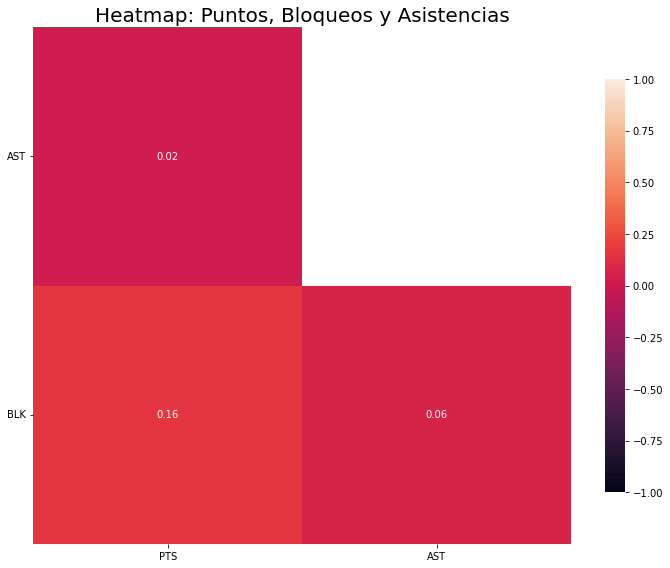

In [294]:
#Lets plot the correlation of the 3 variables in a HeatMap.
np.ones_like(correlation_df3, dtype=bool)
mask = np.triu(np.ones_like(correlation_df3, dtype=bool))
correlation_df3
fig, ax = plt.subplots(figsize=(10,8))# mask

mask = np.triu(np.ones_like(correlation_df3, dtype=bool))# adjust mask and df

mask = mask[1:, :-1]

corr = correlation_df3.iloc[1:,:-1].copy()# plot heatmap

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})# yticks

plt.yticks(rotation=0)
plt.title("Heatmap: Puntos, Bloqueos y Asistencias",  fontsize=20)
plt.tight_layout()
plt.show()

### We can see a positive correlation between the 3 variables.
### Conlusion: The variables are positive correlated that means the variables are directly correlated. When one increase the other also increase.

___
### Lets do the same with the entire Data Set columns.
___

In [295]:
#Apply corr() to the entire Data Frame:
correlation_df = df.corr()

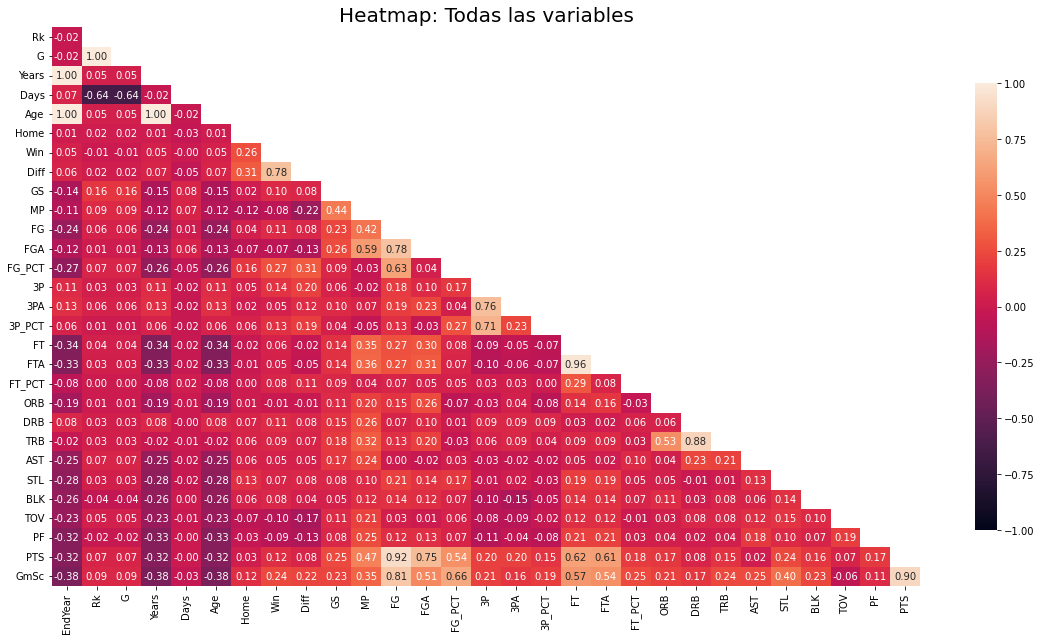

In [296]:
#Lets plot a HeatMap:
np.ones_like(correlation_df, dtype=bool)
mask = np.triu(np.ones_like(correlation_df, dtype=bool))
correlation_df
fig, ax = plt.subplots(figsize=(16,9))# mask

mask = np.triu(np.ones_like(correlation_df, dtype=bool))# adjust mask and df

mask = mask[1:, :-1]

corr = correlation_df.iloc[1:,:-1].copy()# plot heatmap

sns.heatmap(corr, mask=mask, annot=True, fmt=".2f",
           vmin=-1, vmax=1, cbar_kws={"shrink": .8})# yticks

plt.yticks(rotation=0)
plt.title("Heatmap: Todas las variables",  fontsize=20)
plt.tight_layout()
plt.show()

### Conlusion: Here we can analyze the columns that are correlated. Some are positively correlated (when one variable increases, the other also increase), and others are negatively correlated (when one variable increases, the other decreases).
___